## Importing Necessary Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score 

import pickle

import warnings
warnings.filterwarnings('ignore')

#### Load the Data

In [2]:
df = pd.read_csv("./diabetes.csv")

## EDA

In [3]:
# check the first five rows of data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

**We have 768 observations and 9 features.**

In [5]:
# checking the distribution of outcomes
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
# checking null values in data
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**As we can see that there is no missing values.**

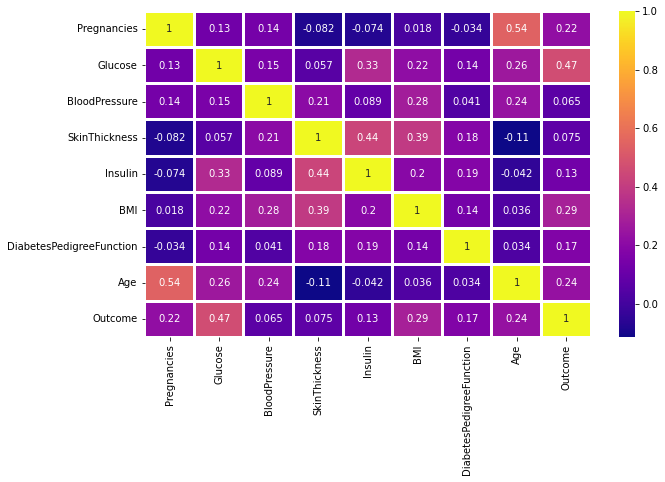

In [7]:
#checking correlation between features
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, linewidths=2,cmap='plasma')
plt.show()

* **Pregnancies,Glucose,BMI,Age have positive correlation with Outcome(target variable).**
* **SkinThickness and Insulin having correlation with each other.**
* **Age and Pregnancies are correlated.**

In [8]:
#checking datatypes of features
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
# Summary Statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Important Observation(s):**<br>
* It seems like null values are present in the form of zeros because almost all the features have minimun value 0.<br>
* It's not possible to have Glucose, BloodPressure, SkinThickness, Insulin, BMI to be zero. So, we have to handle this.<br>
    **Let's check, how many zeroes are present in each feature**.

In [10]:
#replacing zero values with NaN 
features_with_zero = ["Glucose", "BloodPressure", "SkinThickness","Insulin", "BMI"]
for col in features_with_zero:
    df[col].replace(0, np.nan, inplace=True)

In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [12]:
# Now check again the count of Null values 
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

* **We can see there are lot of null values in SkinThickness and Insulin column.**

## Data Cleaning

In [13]:
#Imputing mean instead of null values
for col in features_with_zero:
    df[col].replace(np.nan, df[col].mean(), inplace=True)

In [14]:
# summary statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Now we can see,mean of Insulin and SkinThickness has increased.**

## Data PreProcessing

#### Separating dependent and independent features

In [15]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

#### Splitting the Dataset into Training and Test Set

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=50)

#### Feature Scaling

In [17]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## Model Building

#### Helper Function

In [18]:
#Helper functions to check the performance of different classifiers

#function to display confusion matrix
def displayConfusionMatrix(y_test, y_pred):
    """Displays the confusion matrix in the form of heatmap.
    
    Parameters:
    y_test (array-like): list of true labels
    y_pred (array-like): list of predicted labels
    
    Returns:
    acc_score (float): Accuracy score 
    """
    acc_score = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d",cmap='plasma')
    plt.title(f"Accuracy: {acc_score:0.3f}")
    plt.xlabel("Predicted labels")
    plt.ylabel("Actual labels")
    plt.show()
    return acc_score

#function to build model and display classification report of a classifer
def model(classifier, X_train=X_train, y_train=y_train,
              X_test=X_test, y_test=y_test):
    """Fits the `classifier` to `X_train`, `y_train` and generate an elegant 
    classification report using `X_test` and `y_test`.
    
    Parameters:
    classifer : classifier obj implementing 'fit' method.
    X_train (array-like): 2D-array of input features of Training Set.
    y_train (array-like): list of target features of Training Set.
    X_test  (array-like): 2D-array of input features of Testing Set.
    y_test  (array-like): list of target features of Testing Set.
    
    Returns:
    acc_score (float): Accuracy score 
    """
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc_score = displayConfusionMatrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    return acc_score

### Logistic Regression

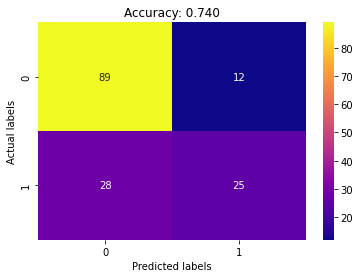

              precision    recall  f1-score   support

           0       0.76      0.88      0.82       101
           1       0.68      0.47      0.56        53

    accuracy                           0.74       154
   macro avg       0.72      0.68      0.69       154
weighted avg       0.73      0.74      0.73       154



In [19]:
log = LogisticRegression(random_state = 50)
log_accuracy = model(log)

### KNN

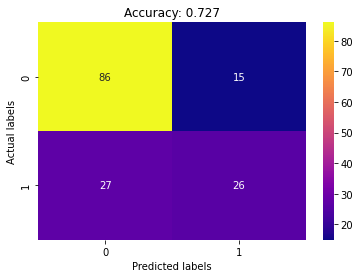

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       101
           1       0.63      0.49      0.55        53

    accuracy                           0.73       154
   macro avg       0.70      0.67      0.68       154
weighted avg       0.72      0.73      0.72       154



In [20]:
knn= KNeighborsClassifier(n_neighbors=7)
knn_accuracy = model(knn)

### Linear-Support Vector Machine(SVM)

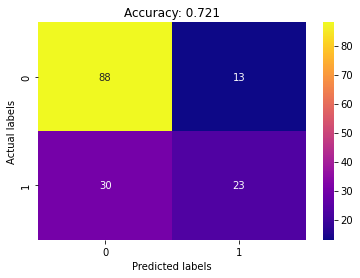

              precision    recall  f1-score   support

           0       0.75      0.87      0.80       101
           1       0.64      0.43      0.52        53

    accuracy                           0.72       154
   macro avg       0.69      0.65      0.66       154
weighted avg       0.71      0.72      0.70       154



In [21]:
linear_svm = SVC(kernel="linear", random_state=50)
lsvm_accuracy = model(linear_svm)

### Radial-Support Vector Machine(SVM)

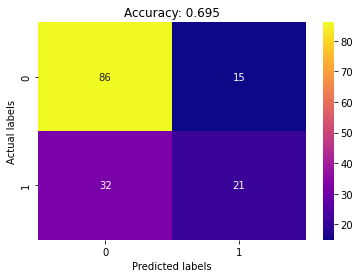

              precision    recall  f1-score   support

           0       0.73      0.85      0.79       101
           1       0.58      0.40      0.47        53

    accuracy                           0.69       154
   macro avg       0.66      0.62      0.63       154
weighted avg       0.68      0.69      0.68       154



In [22]:
radial_svm = SVC(kernel="rbf", random_state=50)
rsvm_accuracy = model(radial_svm)

### Naive Bayes

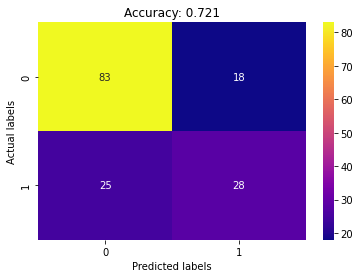

              precision    recall  f1-score   support

           0       0.77      0.82      0.79       101
           1       0.61      0.53      0.57        53

    accuracy                           0.72       154
   macro avg       0.69      0.68      0.68       154
weighted avg       0.71      0.72      0.72       154



In [23]:
nb = GaussianNB()
nb_accuracy = model(nb)

### Decision Tree

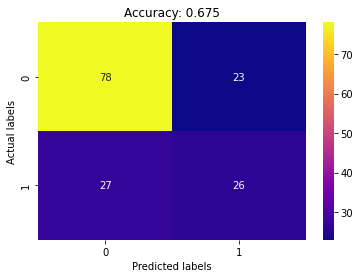

              precision    recall  f1-score   support

           0       0.74      0.77      0.76       101
           1       0.53      0.49      0.51        53

    accuracy                           0.68       154
   macro avg       0.64      0.63      0.63       154
weighted avg       0.67      0.68      0.67       154



In [24]:
dt = DecisionTreeClassifier(criterion="entropy",
                                             random_state=50)
dt_accuracy = model(dt)

### Random Forest

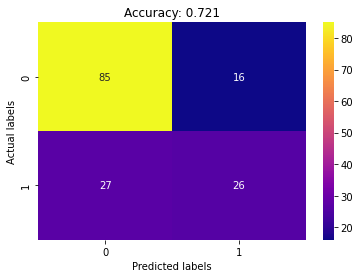

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       101
           1       0.62      0.49      0.55        53

    accuracy                           0.72       154
   macro avg       0.69      0.67      0.67       154
weighted avg       0.71      0.72      0.71       154



In [25]:
rf = RandomForestClassifier(n_estimators=150,
                                            criterion="entropy",
                                            random_state=50)
rf_accuracy = model(rf)

### XGBoost

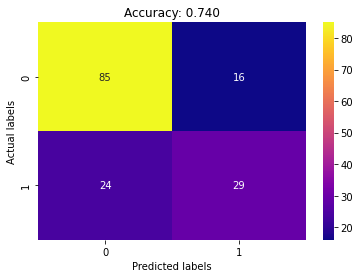

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       101
           1       0.64      0.55      0.59        53

    accuracy                           0.74       154
   macro avg       0.71      0.69      0.70       154
weighted avg       0.73      0.74      0.73       154



In [26]:
xgb= XGBClassifier(use_label_encoder=False,
                       verbosity=0)
xgb_accuracy = model(xgb)

### Model Comparison

In [27]:
models = pd.DataFrame({
    'Model': ["Logistic Regression", "KNN", "SVM-Linear", "SVM-RBF", 
             "Naive Bayes", "Decision Tree", "Random Forest", "XGBoost"],
    'Accuracy Score': [log_accuracy, knn_accuracy, lsvm_accuracy, rsvm_accuracy, 
                       nb_accuracy, dt_accuracy, rf_accuracy, xgb_accuracy]
})

models.sort_values(by = 'Accuracy Score', ascending = False, ignore_index=True)

,Model,Accuracy Score
0,Logistic Regression,0.740260
1,XGBoost,0.740260
2,KNN,0.727273
3,SVM-Linear,0.720779
4,Naive Bayes,0.720779
5,Random Forest,0.720779
6,SVM-RBF,0.694805
7,Decision Tree,0.675325


* **It seems like Logistic Regression and XGBoost performs best!**
* **But before we jump into any conclusions let's perform K-fold cross validation.**

### K-Fold Cross Validation

#### Helper Function

In [28]:
def perform_kfold(clf, X_train=X_train, y_train=y_train):
    """Performs k-fold cross validation on given data(X_train, y_train) using 
    the `clf` (aka classifier)
    
    Parameters:
    classifer : classifier obj implementing 'fit' method.
    X_train (array-like): 2D-array of input features of Training Set.
    y_train (array-like): list of target features of Training Set.
    
    Returns:
    mean_score (float): Mean of Accuracy scores after operation.
    std_score  (float): Standard Deviation of Accuracy scores.
    """
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, 
                            cv=10
                            )
    
    mean_score = scores.mean()
    std_score = scores.std()
    print(f"Mean Accuracy: {mean_score*100:0.3f} %")
    print(f"Standard Deviation: {std_score*100:0.3f} %")
    
    return mean_score, std_score

#### Logistic Regression

In [29]:
log_macc, log_std = perform_kfold(log)

Mean Accuracy: 77.525 %
Standard Deviation: 4.168 %


#### KNN

In [30]:
knn_macc, knn_std = perform_kfold(knn)

Mean Accuracy: 75.894 %
Standard Deviation: 5.734 %


#### Linear-Support Vector Machine(SVM)

In [31]:
lsvm_macc, lsvm_std = perform_kfold(linear_svm)

Mean Accuracy: 77.364 %
Standard Deviation: 4.382 %


#### Radial-Support Vector Machine(SVM)

In [32]:
rsvm_macc, rsvm_std = perform_kfold(radial_svm)

Mean Accuracy: 77.515 %
Standard Deviation: 3.215 %


#### Naive Bayes

In [33]:
nb_macc, nb_std = perform_kfold(nb)

Mean Accuracy: 75.730 %
Standard Deviation: 6.306 %


#### Decision Tree

In [34]:
dt_macc, dt_std = perform_kfold(dt)

Mean Accuracy: 70.026 %
Standard Deviation: 7.175 %


#### Random Forest

In [35]:
rf_macc, rf_std = perform_kfold(rf)

Mean Accuracy: 77.515 %
Standard Deviation: 3.898 %


#### XGBoost

In [36]:
xgb_macc, xgb_std = perform_kfold(xgb)

Mean Accuracy: 76.052 %
Standard Deviation: 4.156 %


#### Comparing Models after K-fold cross validation

In [37]:
cross_validated_models = pd.DataFrame({
    "Model": ["Logistic Regression", "KNN", "SVM-Linear", "SVM-RBF", 
             "Naive Bayes", "Decision Tree", "Random Forest", "XGBoost"],
    "Mean Accuracy Score": [log_macc, knn_macc, lsvm_macc, rsvm_macc, 
                       nb_macc, dt_macc, rf_macc, xgb_macc],
    "Standard Deviation": [log_std, knn_std, lsvm_std, rsvm_std, 
                       nb_std, dt_std, rf_std, xgb_std]
})

cross_validated_models.sort_values(by = 'Mean Accuracy Score', ascending = False,
                     ignore_index=True)

,Model,Mean Accuracy Score,Standard Deviation
0,Logistic Regression,0.775251,0.041685
1,Random Forest,0.775145,0.038979
2,SVM-RBF,0.775145,0.032154
3,SVM-Linear,0.773638,0.043824
4,XGBoost,0.760524,0.041557
5,KNN,0.758937,0.057338
6,Naive Bayes,0.757298,0.063057
7,Decision Tree,0.700264,0.071748


* **So, it turns out LogisticRegression is the winners after K-fold Crossvalidation.**

In [38]:
pickle.dump(log, open('pima_log.pkl','wb'))
pickle.dump(ss, open('scaling.pkl', 'wb'))

In [39]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33


In [54]:
data_check = np.array(list(X.iloc[10,:])).reshape(1,-1)
data_check

array([[  4.        , 110.        ,  92.        ,  29.15341959,
        155.54822335,  37.6       ,   0.191     ,  30.        ]])

In [50]:
new_data = ss.transform(data_check)
new_data

array([[ 0.03490564, -0.39987065,  1.59198503,  0.02457771,  0.02272654,
         0.73684208, -0.84264968, -0.29273554]])

In [53]:
log.predict(new_data)[0]

0

In [55]:
X.iloc[10,:]

Pregnancies                   4.000000
Glucose                     110.000000
BloodPressure                92.000000
SkinThickness                29.153420
Insulin                     155.548223
BMI                          37.600000
DiabetesPedigreeFunction      0.191000
Age                          30.000000
Name: 10, dtype: float64